<div style="background: linear-gradient(135deg, #20002c, #cbb4d4); padding:25px; border-radius:15px; text-align:center;">
<h1 style="color:white; font-size:45px; font-family:Roboto;">
📱 SMARTPHONE PRICE ANALYSIS
</h1></div>

<h1 style="font-family:'Impact'; font-size:55px; color:#0D47A1; text-align:center;">
IMPORT LIBRARIES
</h1>

In [158]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from tabulate import tabulate
%matplotlib inline

<h1 style="font-family:'Impact'; font-size:55px; color:#0D47A1; text-align:center;">
LOAD DATASET
</h1>

In [159]:
df=pd.read_csv(r"C:\Users\tsiha\Downloads\Global_Mobile_Prices_2025_Extended.csv")
df.head()

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


<h1 style="font-family:'Impact'; font-size:40px; color:#0D47A1; text-align:center;">
COLUMN,SHAPE,INFO,DESCRIBE
</h1>

In [160]:
df.columns

Index(['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
       'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os',
       'processor', 'rating', 'release_month', 'year'],
      dtype='object')

In [161]:
df.shape

(1000, 15)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [163]:
df.describe()

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


In [165]:
for i in df:
    print(i)
    print(df[i].unique())
    print(" "*50)
    print("no. of unique values",df[i].nunique())
    print(" "*50)
    print("*"*50)

brand
['Oppo' 'Realme' 'Xiaomi' 'Vivo' 'Apple' 'OnePlus' 'Infinix' 'Samsung'
 'Google']
                                                  
no. of unique values 9
                                                  
**************************************************
model
['A98 111' '11 Pro+ 843' 'Redmi Note 14 Pro 461' 'V29e 744'
 'iPhone 16 Pro Max 927' 'Nord 4 295' 'GT 20 Pro 112'
 'iPhone 16 Pro Max 232' 'Hot 40 111' 'GT 7 Pro 668' 'Galaxy Z Fold6 423'
 'iPhone 14 397' 'V30 400' 'Narzo 70 620' 'Poco F6 497' 'Poco X6 Pro 400'
 'Hot 40 658' 'Galaxy Z Fold6 163' 'Nord CE 4 Lite 503' 'OnePlus 12 729'
 'Galaxy Z Fold6 195' 'Pixel 9 Pro 845' 'iPhone 14 328' 'GT Neo 6 18'
 'Pixel 7a 954' 'Galaxy S24 662' 'Note 40 Pro 925' 'Hot 40 967'
 'GT 7 Pro 119' 'X100 Pro 546' 'Galaxy M55 471' 'Y100A 290' 'Poco F6 169'
 'iPhone 14 43' 'GT 20 Pro 383' 'Reno 11 961' 'Zero 30 940' 'Pixel 8 757'
 'Galaxy Z Fold6 721' 'iPhone 16 Pro Max 362' 'Galaxy Z Fold6 609'
 'Pixel 9 879' 'Galaxy A75 850' 'C65 386' 'Gal

In [116]:
df.isnull().sum()

brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64

In [117]:
df_no=df.select_dtypes('number')
df_no

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
0,855,16,128,108,6000,6.6,33,3.8,2025
1,618,6,128,64,4500,6.9,100,4.4,2025
2,258,16,64,64,4000,6.8,44,4.1,2025
3,837,6,512,48,4500,6.0,65,4.1,2025
4,335,12,128,200,5000,6.9,100,3.5,2025
...,...,...,...,...,...,...,...,...,...
995,961,8,256,12,4000,5.9,44,4.0,2025
996,158,16,64,64,5500,5.6,65,3.5,2025
997,1164,6,128,200,4500,5.7,120,4.8,2025
998,895,8,64,48,5000,7.0,65,4.6,2025


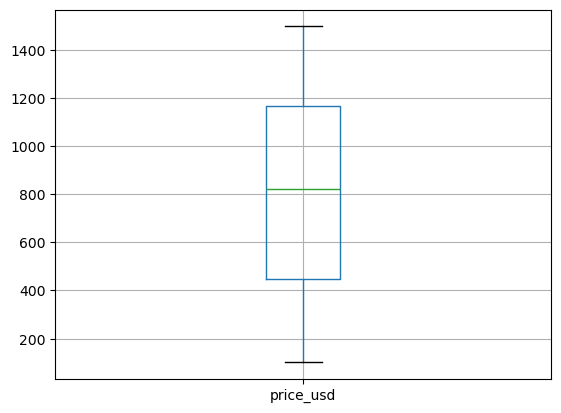

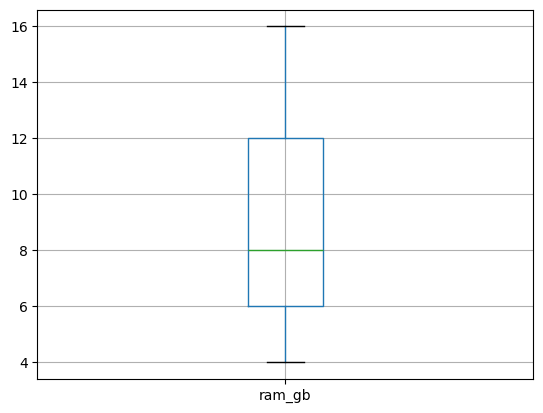

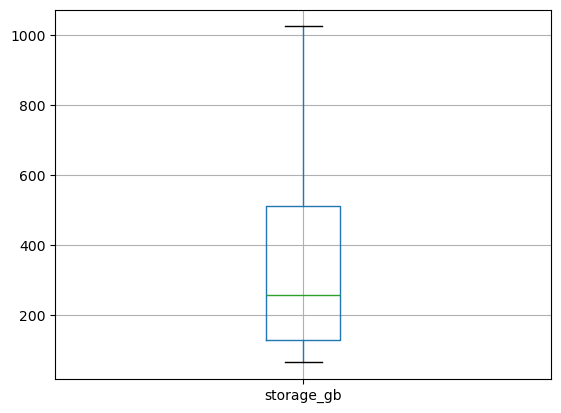

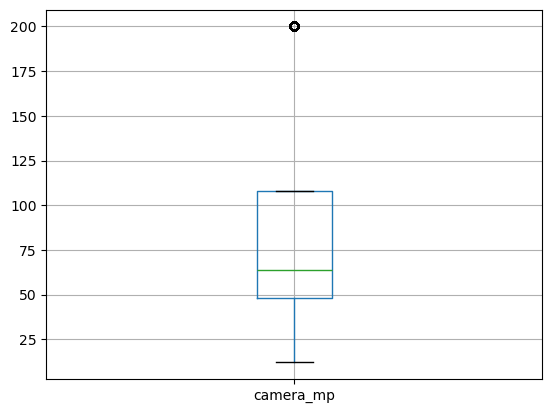

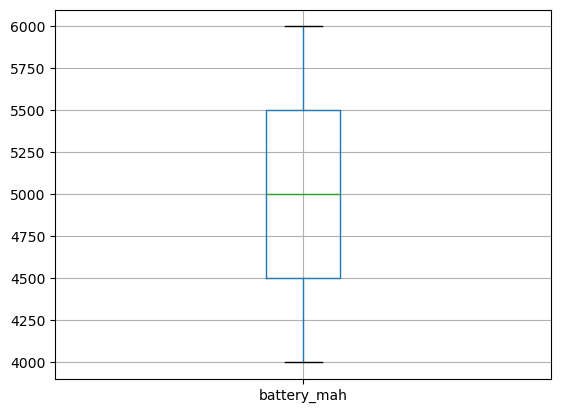

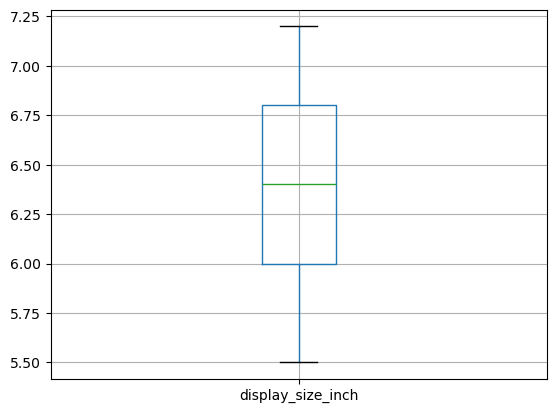

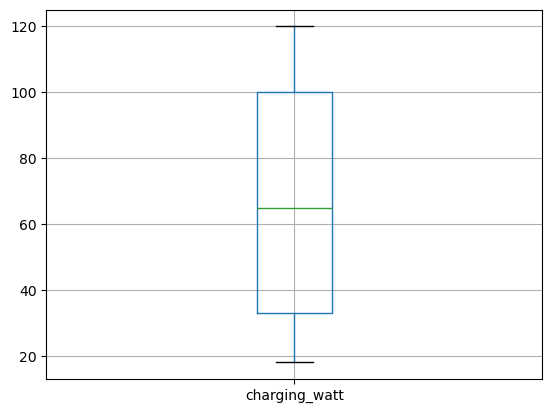

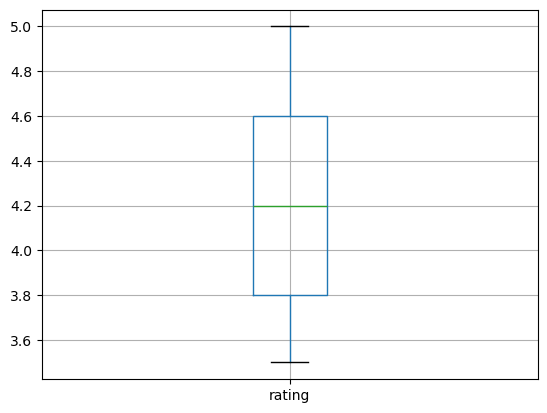

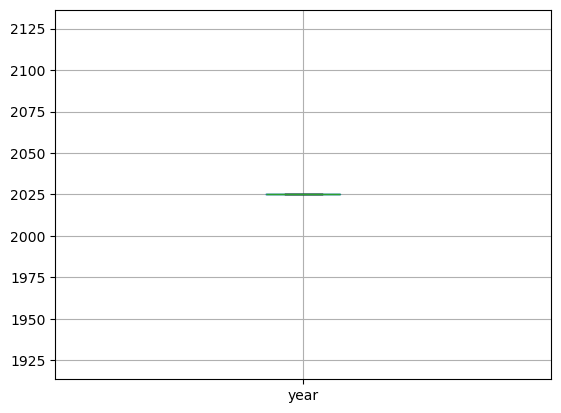

In [118]:

for x in df_no:
    plt.figure()
    df.boxplot(column=[x])
    plt.show()

for i in df_no:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[i]=df[i].clip(lower,upper)

<h1 style="font-family:'Impact'; font-size:55px; color:#0D47A1; text-align:center;">
📊 VISUALIZATION
</h1>


<h1 style="
background:#0b0b0c;
color:#e2e2e2;
text-align:LEFT;
padding:18px;
border-radius:12px;
font-weight:900;
letter-spacing:2px;
text-transform:uppercase;
border-left:6px solid #cc0000;
box-shadow:0 0 18px rgba(204,0,0,0.6);
font-family: 'Segoe UI', sans-serif;">
1) UNIVARIATE ANALYSIS
</h1>



<h1 style="font-family: Arial; color: teal; font-size: 25px;">
    Histplot
</h1>




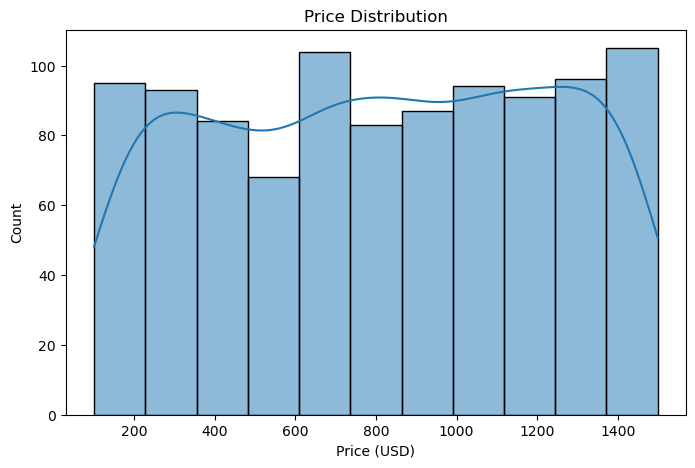

In [119]:
plt.figure(figsize=(8,5))
sns.histplot(df["price_usd"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()


<h1 style="
background:#0b0b0c;
color:#e2e2e2;
text-align:LEFT;
padding:18px;
border-radius:12px;
font-weight:900;
letter-spacing:2px;
text-transform:uppercase;
border-left:6px solid #cc0000;
box-shadow:0 0 18px rgba(204,0,0,0.6);
font-family: 'Segoe UI', sans-serif;">
2)BIVARIATE ANALYSIS
</h1>


<h1 style="font-family: Arial; color: teal; font-size: 25px;">
    Scatterplot
</h1>


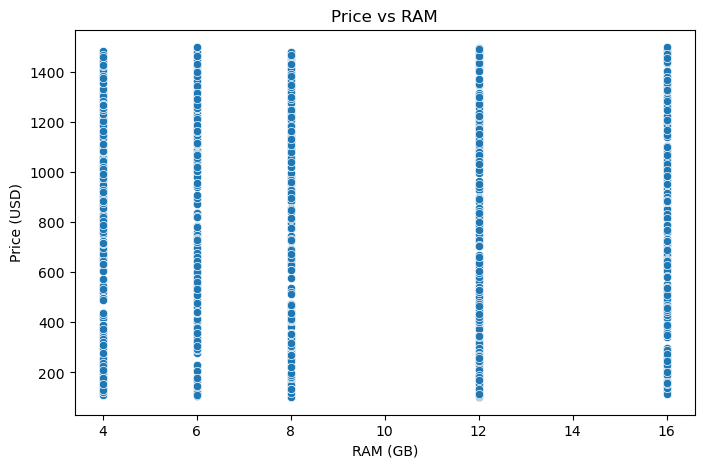

In [120]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["ram_gb"], y=df["price_usd"])
plt.title("Price vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (USD)")
plt.show()

<h1 style="font-family: Arial; color: teal; font-size: 25px;">
    Boxplot
</h1>


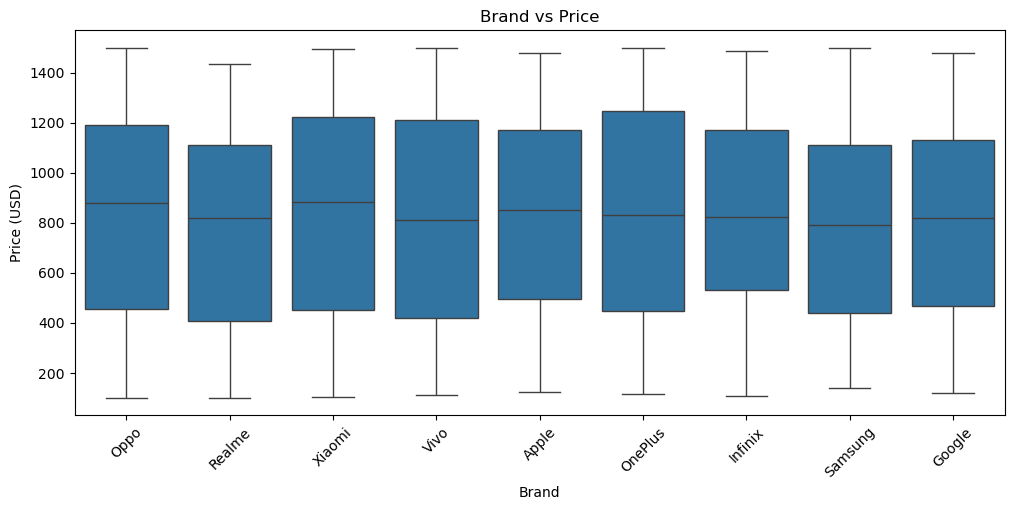

In [121]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["brand"], y=df["price_usd"])
plt.title("Brand vs Price")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.show()

<h1 style="
background:#0b0b0c;
color:#e2e2e2;
text-align:LEFT;
padding:18px;
border-radius:12px;
font-weight:900;
letter-spacing:2px;
text-transform:uppercase;
border-left:6px solid #cc0000;
box-shadow:0 0 18px rgba(204,0,0,0.6);
font-family: 'Segoe UI', sans-serif;">
3)MULTIVARIATE ANALYSIS
</h1>


<h1 style="font-family: Arial; color: teal; font-size: 25px;">
    Heatmap
</h1>


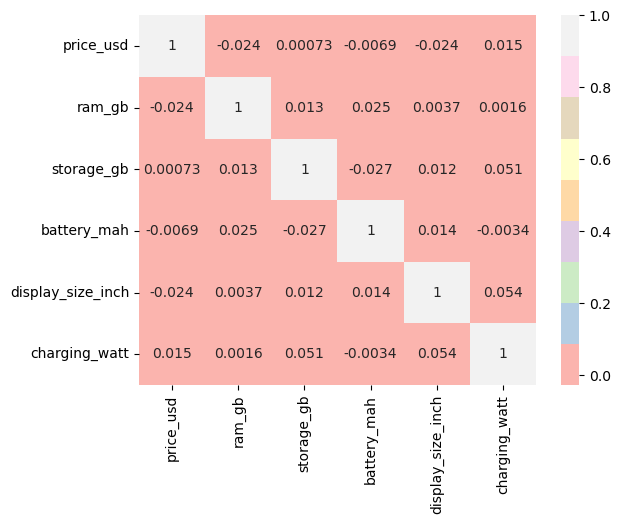

In [123]:
sns.heatmap(df[['price_usd','ram_gb','storage_gb','battery_mah','display_size_inch','charging_watt']].corr(),annot=True,cmap='Pastel1')
plt.show()

In [124]:
df = df.drop(columns=['year','model'], axis=1)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   price_usd          1000 non-null   int64  
 2   ram_gb             1000 non-null   int64  
 3   storage_gb         1000 non-null   int64  
 4   camera_mp          1000 non-null   int64  
 5   battery_mah        1000 non-null   int64  
 6   display_size_inch  1000 non-null   float64
 7   charging_watt      1000 non-null   int64  
 8   5g_support         1000 non-null   object 
 9   os                 1000 non-null   object 
 10  processor          1000 non-null   object 
 11  rating             1000 non-null   float64
 12  release_month      1000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 101.7+ KB


In [126]:
df['release_month'].nunique()

12

In [127]:
df_ob=df.select_dtypes("object")
df_ob

,brand,5g_support,os,processor,release_month
0,Oppo,Yes,Android,Helio G99,February
1,Realme,Yes,Android,Tensor G4,August
2,Xiaomi,Yes,Android,A18 Pro,March
3,Vivo,Yes,Android,Exynos 2400,August
4,Apple,Yes,iOS,Dimensity 9300,February
...,...,...,...,...,...
995,Google,Yes,Android,Helio G99,November
996,OnePlus,Yes,Android,Dimensity 9300,November
997,Xiaomi,No,Android,Helio G99,January
998,Realme,No,Android,A18 Pro,August


In [128]:
df_ob.columns

Index(['brand', '5g_support', 'os', 'processor', 'release_month'], dtype='object')

<h1 style="font-family:'Impact'; font-size:55px; color:#0D47A1; text-align:center;">
🔢 LABEL ENCODING
</h1>

In [129]:
df=pd.get_dummies(df,columns=['brand', '5g_support', 'os', 'processor', 'release_month'])

In [130]:
# le=LabelEncoder()
# df['brand']=le.fit_transform(df['brand'])
# df['processor']=le.fit_transform(df['processor'])
# df['5g_support']=le.fit_transform(df['5g_support'])
# df['os']=le.fit_transform(df['os'])
# df['release_month']=le.fit_transform(df['release_month'])

In [131]:
df

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,brand_Apple,brand_Google,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,855,16,128,108,6000,6.6,33,3.8,False,False,...,False,True,False,False,False,False,False,False,False,False
1,618,6,128,64,4500,6.9,100,4.4,False,False,...,False,False,False,False,False,False,False,False,False,False
2,258,16,64,64,4000,6.8,44,4.1,False,False,...,False,False,False,False,False,True,False,False,False,False
3,837,6,512,48,4500,6.0,65,4.1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,335,12,128,200,5000,6.9,100,3.5,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,961,8,256,12,4000,5.9,44,4.0,False,True,...,False,False,False,False,False,False,False,True,False,False
996,158,16,64,64,5500,5.6,65,3.5,False,False,...,False,False,False,False,False,False,False,True,False,False
997,1164,6,128,200,4500,5.7,120,4.8,False,False,...,False,False,True,False,False,False,False,False,False,False
998,895,8,64,48,5000,7.0,65,4.6,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
# scaler=zRobustScaler()

In [133]:
# scaled_data=scaler.fit_transform(df)

In [134]:
# df=pd.DataFrame(scaled_data,columns=df.columns)


<h1 style="font-family:'Impact'; font-size:55px; color:#0D47A1; text-align:center;">
🤖 MODEL BUILDING
</h1>


In [135]:
x=df.drop('price_usd', axis=1)

In [136]:
x

,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,brand_Apple,brand_Google,brand_Infinix,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,16,128,108,6000,6.6,33,3.8,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,6,128,64,4500,6.9,100,4.4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16,64,64,4000,6.8,44,4.1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,6,512,48,4500,6.0,65,4.1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12,128,200,5000,6.9,100,3.5,True,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,256,12,4000,5.9,44,4.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
996,16,64,64,5500,5.6,65,3.5,False,False,False,...,False,False,False,False,False,False,False,True,False,False
997,6,128,200,4500,5.7,120,4.8,False,False,False,...,False,False,True,False,False,False,False,False,False,False
998,8,64,48,5000,7.0,65,4.6,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
y=df['price_usd']

In [138]:
y

0       855
1       618
2       258
3       837
4       335
       ... 
995     961
996     158
997    1164
998     895
999     458
Name: price_usd, Length: 1000, dtype: int64

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [140]:

# sc1 = StandardScaler()
# sc2 = StandardScaler()

# x_train_scaled = sc1.fit_transform(x_train)
# x_test_scaled = sc1.transform(x_test)

# y_train_scaled = sc2.fit_transform(y_train.values.reshape(-1,1)).ravel()

In [141]:
ln=LinearRegression()

In [142]:
ln=ln.fit(x_train,y_train)

In [143]:
ln_pred=ln.predict(x_test)

In [144]:
r2=r2_score(y_test,ln_pred)

In [145]:
r2

-0.0867133631687882

<h1 style="font-family:'Impact'; font-size:45px; color:#0D47A1; text-align:center;">
⚖️ SCAILING & MAKE REGRESSION
</h1>

In [146]:




x_train, y_train = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
x_test, y_test = make_regression(n_samples=50, n_features=5, noise=0.1, random_state=42)


scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



<h1 style="font-family:'Impact'; font-size:40px; color:#0D47A1; text-align:center;">
SUPERVISED MACHINE LEARNING ALGORITHMS
</h1>

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Random Forest
</h1>


In [147]:
rf=RandomForestRegressor(n_estimators=200,random_state=42)

In [148]:
rf=rf.fit(x_train,y_train)

In [149]:
rf_pred=rf.predict(x_test)

In [150]:
r2_1=r2_score(y_test,rf_pred)

In [152]:
r2_1

0.687064127306517

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Support Vector Machine
</h1>


In [44]:
svr=SVR(kernel="linear")

In [45]:
svr=svr.fit(x_train,y_train)

In [46]:
y_svrl=svr.predict(x_test)

In [47]:
r2_svrl=r2_score(y_test,y_svrl)

In [48]:
r2_svrl

0.6694881238502022

In [49]:
svr_rbf=SVR(kernel="rbf",C=10,epsilon= 0.01, gamma= 'auto')

In [50]:
svr_rbf=svr_rbf.fit(x_train,y_train)

In [51]:
y_svrbf=svr_rbf.predict(x_test)

In [52]:
r2_svrbf=r2_score(y_test,y_svrbf)

In [53]:
r2_svrbf

0.46877372179473387

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    KNN
</h1>


In [54]:
metric_k=[]
neighbors=np.arange(3,15)

In [55]:
for k in neighbors:
    regressor=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    regressor.fit(x_train,y_train)
    y_prediction=regressor.predict(x_test)
    r2=r2_score(y_test,y_prediction)
    metric_k.append(r2)

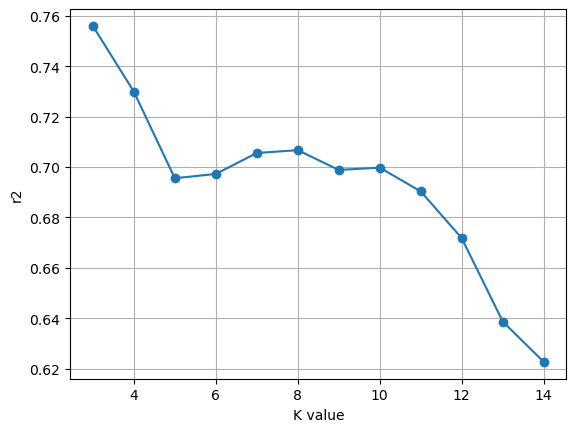

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2')
plt.grid()
plt.show()

In [57]:
regressor=KNeighborsRegressor(n_neighbors=9,metric='euclidean')
knn=regressor.fit(x_train,y_train)
y_prediction=regressor.predict(x_test)

In [58]:
KNN_acc=r2_score(y_test,y_prediction)
KNN_acc

0.6988544920278217

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    XGBoost
</h1>


In [59]:
model_xgb=XGBRegressor()

In [60]:
model_xgb=model_xgb.fit(x_train,y_train)

In [61]:
y_xgb=model_xgb.predict(x_test)

In [62]:
r2_xgb=r2_score(y_test,y_xgb)
r2_xgb

0.7404643390796652

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    CatBoost
</h1>


In [63]:
model_cbr=CatBoostRegressor(verbose=0)

In [64]:
model_cbr=model_cbr.fit(x_train,y_train)

In [65]:
y_cbr=model_cbr.predict(x_test)

In [66]:
r2_xgb1=r2_score(y_test,y_cbr)
r2_xgb1

0.7910099676056853

In [67]:
# Step 2: Define the SVR model
# svr_rbf = SVR(kernel="rbf")

# # Step 3: Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.2],
#     'gamma': ['scale', 'auto']
# }

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(svr_rbf, param_grid, cv=5)
# grid_search.fit(x_train_scaled, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Step 4: Train the model using the best parameters
# svr_best = grid_search.best_estimator_


<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Decision Tree
</h1>


In [68]:
dt_reg=DecisionTreeRegressor(max_depth=4,criterion='squared_error',random_state=42)

In [69]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [70]:
y_pred1=dt_reg.predict(x_test)

In [71]:
mse2=mean_squared_error(y_test,y_pred1)
r22=r2_score(y_test,y_pred1)

In [72]:
mse2

7440.7632169100925

In [73]:
r22

0.5271554690503719

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Ridge
</h1>


In [74]:
from sklearn.linear_model import Ridge

In [75]:
model2=Ridge(alpha=1.0)

In [76]:
model2.fit(x_train,y_train)

Ridge()

In [77]:
y_pred2=model2.predict(x_test)

In [78]:
mser=mean_squared_error(y_test,y_pred2)
r2r=r2_score(y_test,y_pred2)

In [79]:
mser

2103.0856363855787

In [80]:
r2r

0.8663534220490093


<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Lasso
</h1>


In [81]:
model3=Lasso(alpha=0.1)

In [82]:
model3.fit(x_train,y_train)

Lasso(alpha=0.1)

In [83]:
y_pred3=model3.predict(x_test)

In [84]:
msel=mean_squared_error(y_test,y_pred3)
r2l=r2_score(y_test,y_pred3)

In [85]:
msel

2138.884228608692

In [86]:
r2l

0.8640784983543639

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    lightgbm
</h1>


In [87]:
import lightgbm as lgb
modelgb=lgb.LGBMRegressor(verbose=0)

In [88]:
modelgb=modelgb.fit(x_train,y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [89]:
ygb_pred=modelgb.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [90]:
mse=mean_squared_error(y_test,ygb_pred)
r2gb=r2_score(y_test,ygb_pred)

In [91]:
mse

4415.300520011024

In [92]:
r2gb

0.7194171293286716

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Metrics
</h1>


In [93]:
rmse=np.sqrt(mse)
rmse

np.float64(66.4477277264695)

In [94]:
mae=mean_absolute_error(y_test,y_pred2)

In [95]:
mae

37.50232013974297

<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    Tabulate
</h1>


In [96]:
from tabulate import tabulate
table=[["ln","r2"],["Linear Regression",r2],
       ["Random Forest",r2_1],["Decision Tree",r22],
       ["Ridge",r2r],["Lasso",r2_score(y_test,y_pred3)],
       ["SVC[linear]",r2_svrl],["SVC[rbf]",r2_svrbf],
       ["KNN",KNN_acc],["XG boost",r2_xgb],
       ["Cat boost",r2_xgb1],["LIGHT GBM",r2gb]]
print(tabulate(table,headers="firstrow",tablefmt="fancy_grid"))


╒═══════════════════╤══════════╕
│ ln                │       r2 │
╞═══════════════════╪══════════╡
│ Linear Regression │ 0.622742 │
├───────────────────┼──────────┤
│ Random Forest     │ 0.687064 │
├───────────────────┼──────────┤
│ Decision Tree     │ 0.527155 │
├───────────────────┼──────────┤
│ Ridge             │ 0.866353 │
├───────────────────┼──────────┤
│ Lasso             │ 0.864078 │
├───────────────────┼──────────┤
│ SVC[linear]       │ 0.669488 │
├───────────────────┼──────────┤
│ SVC[rbf]          │ 0.468774 │
├───────────────────┼──────────┤
│ KNN               │ 0.698854 │
├───────────────────┼──────────┤
│ XG boost          │ 0.740464 │
├───────────────────┼──────────┤
│ Cat boost         │ 0.79101  │
├───────────────────┼──────────┤
│ LIGHT GBM         │ 0.719417 │
╘═══════════════════╧══════════╛


<h1 style="font-family: Arial; color: teal; font-size: 30px;">
    RandomizedSearchCV 
</h1>


In [97]:
model2=Ridge(alpha=1.0)

In [98]:
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]
}


In [99]:
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500,
                                   1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga']},
             scoring='r2')

In [100]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500,
                                   1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga']},
             scoring='r2')

In [101]:
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'sag'}
Best Score: 0.999999364830894


In [102]:
print("Test r2_score:", grid.score(x_test, y_test))

Test r2_score: 0.8638792333718779


In [103]:
model=Ridge(alpha = 0.001, fit_intercept = False, max_iter = 2000, solver = 'sag')


In [104]:
model.fit(x_train,y_train)

Ridge(alpha=0.001, fit_intercept=False, max_iter=2000, solver='sag')

In [105]:
y_xgb2=model.predict(x_test)

In [106]:
r2_xgb2=r2_score(y_test,y_xgb2)

In [107]:
r2_xgb2

0.8638203535742339

In [108]:
new_data=[[	128,108,6000,6.6,33,3.8,False,False,False]]
pred=r2_xgb.predict(new_data)
pred

AttributeError: 'float' object has no attribute 'predict'